In [5]:
"""
$ pip install requests
"""

import requests
from IPython.core.display import display, HTML, Image


In [1]:
import sys
sys.version_info

sys.version_info(major=3, minor=5, micro=0, releaselevel='final', serial=0)

In [2]:
requests.get('http://noisebridge.net')

<Response [200]>

In [3]:
requests.get('http://noisebridge.net').text

'<!DOCTYPE html>\n<html lang="en" dir="ltr" class="client-nojs">\n<head>\n<title>Noisebridge</title>\n<meta charset="UTF-8" />

In [7]:
requests.post('https://api.github.com/markdown', json={
  'text': 'what a *bold* statement',
}).text

'<p>what a <em>bold</em> statement</p>\n'

In [8]:
response = requests.get('https://api.github.com/emojis')
data = response.json()

html = requests.post('https://api.github.com/markdown', json={
  "text": " ".join("{0} is :{0}:".format(k) for k in data.keys())[:500],
}).text

display(HTML(html))

In [9]:
requests.post('https://api.postmarkapp.com/email',
    headers={
        'X-Postmark-Server-Token': os.environ['POSTMARK_API_TOKEN']
    },
    json={
        'From': 'razzi@abuissa.net',
        'To': 'razzi53@gmail.com',
        'Subject': 'here are some emoji',
        'HtmlBody': html
    }
)

<Response [200]>

In [11]:
import asyncio
import aiohttp

loop = asyncio.get_event_loop()
loop

<_UnixSelectorEventLoop running=False closed=False debug=False>

In [27]:
async def main(session):
    response = await session.get('http://python.org')
    status = response.status
    print(status)
    
    content = await response.read()
    print(content)

    
loop = asyncio.get_event_loop()

with aiohttp.ClientSession(loop=loop) as session:
    loop.run_until_complete(main(session))

200
b'<!doctype html>\n<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->\n<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->\n<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->\n\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">\n\n    <meta name="application-name" content="Python.org">\n    <meta name="msapplication-tooltip" content="The official home of the Python Programming Language">\n 

In [16]:
import sys
sys.version_info

sys.version_info(major=3, minor=5, micro=0, releaselevel='final', serial=0)

Total time: 1.1105239391326904


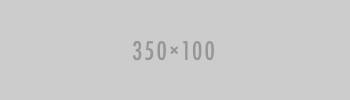

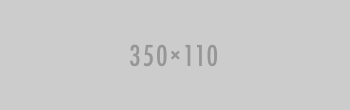

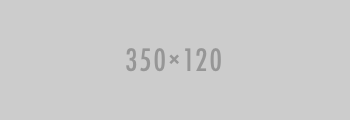

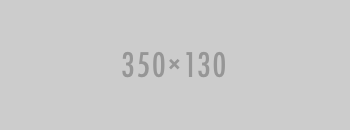

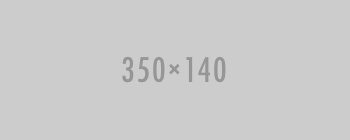

In [45]:
# Asyncio version of 5 concurrent requests

import asyncio
import aiohttp
import time

async def main(session):
    start_time = time.time()
    
    requests = [
        session.get('http://placehold.it/350x{}'
                    .format(i * 10))
        for i in range(10, 15)
    ]
    
    responses = await asyncio.gather(*requests)

    images = await asyncio.gather(*[
        resp.read()
        for resp in responses
    ])

    print('Total time: {}'.format(time.time() - start_time))    
    
    for image in images:
        display(Image(image))
        
        

loop = asyncio.get_event_loop()

with aiohttp.ClientSession(loop=loop) as session:
    loop.run_until_complete(main(session))


Total time: 5.6969568729400635


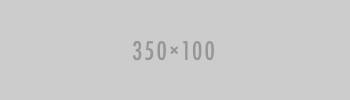

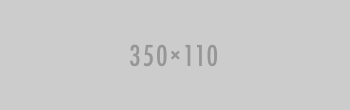

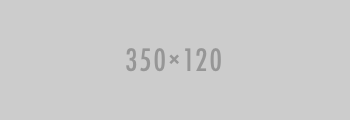

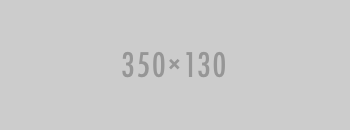

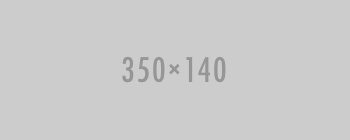

In [46]:
# Synchronous 5 requests: about 5x slower

def main():
    start_time = time.time()
    
    urls = [
        'http://placehold.it/350x{}'
        .format(i * 10)
        for i in range(10, 15)
    ]
    
    images = [
        requests.get(url).content
        for url in urls
    ]

    print('Total time: {}'.format(time.time() - start_time))    
    
    for image in images:
        display(Image(image))
        
main()

In [ ]:
# Other useful links

"""
Python HTTP library docs:

http://python-requests.org/
http://aiohttp.readthedocs.io/

Other:

httpbin.org: debug your http requests
httpie: quickly interact with an http api
"""